In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pydove as dv
sns.set(font_scale=1.5)

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
df = pd.DataFrame([
    ['Call of Duty: Ghosts','Riley the Dog',2013,23_020],
    ['Ryse: Son of Rome','',2014,85_000],
    ['Trials Fusion','',2014,14_000],
    ['Tom Clancy\'s Rainbow Six Siege','',2015,40_000],
    ['Final Fantasy 15','',2018,100_000],
    ['Nier: Automata','2B',2017,72_000],
    ['Fortnite','',2017,23_041],
    ['Half-Life','Zombie',1998,844],
    ['Half-Life 2','Alyx Vance',2004,8_323],
    ['Half-Life 2','Barney',2004,5_922],
    ['Lost planet','Wayne',2007,12_392],
    ['Mass Effect','Sheppard',2007,20_000],
    ['Quake','',1996,200],
    ['Quake 4','',2006,2_500],
    ['Unreal Tournament','player model',1999,800],
    ['Unreal Tournament 2k3','player model',2003,3_000],
    ['Crysis','1st person',2007,6_000],
    ['Crysis 3','',2013,60_000],
    ['Watch Dogs','',2014,64_769],
    ['Bulletstorm','',2011,43_709],
    ['The Witcher','Geralt',2007,10_875],
    ['The Witcher 2: Enhanced Edition','Geralt of Rivia (Seltkirk)',2011,31_624],
    ['The Witcher 2: Enhanced Edition','Geralt of Rivia (rags)',2011,17_424],
], columns=['game_name', 'char_name', 'year', 'triangles'])
# taking pc release date
df

,game_name,char_name,year,triangles
0,Call of Duty: Ghosts,Riley the Dog,2013,23020
1,Ryse: Son of Rome,,2014,85000
2,Trials Fusion,,2014,14000
3,Tom Clancy's Rainbow Six Siege,,2015,40000
4,Final Fantasy 15,,2018,100000
5,Nier: Automata,2B,2017,72000
6,Fortnite,,2017,23041
7,Half-Life,Zombie,1998,844
8,Half-Life 2,Alyx Vance,2004,8323
9,Half-Life 2,Barney,2004,5922


In [8]:
df.describe()

,year,triangles
count,23.000000,23.000000
mean,2008.956522,28062.739130
std,6.270264,29380.648223
min,1996.000000,200.000000
25%,2005.000000,5961.000000
50%,2011.000000,17424.000000
75%,2014.000000,41854.500000
max,2018.000000,100000.000000


sources: 
- https://polycount.com/discussion/141061/polycounts-in-next-gen-games-thread
- http://community.foundry.com/discuss/topic/87578
- http://forums.cgsociety.org/t/polycount-video-game-character/1120757
- https://www.gamespot.com/forums/system-wars-314159282/polygon-counts-bone-joint-counts-texture-counts-31881075/

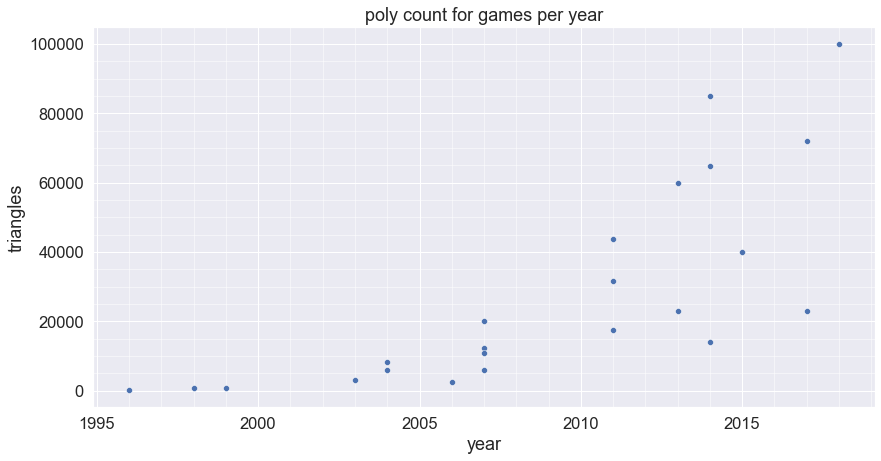

In [9]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('poly count for games per year')
sns.scatterplot(data=df,y='triangles',x='year',ax=ax)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

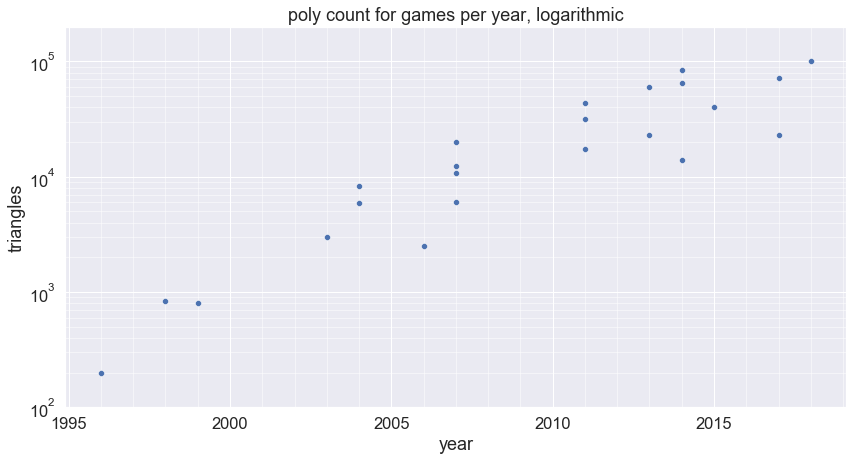

In [10]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('poly count for games per year, logarithmic')
ax.set(yscale="log")
sns.scatterplot(data=df,y='triangles',x='year',ax=ax)
ax.set_ylim(100, 200_000)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

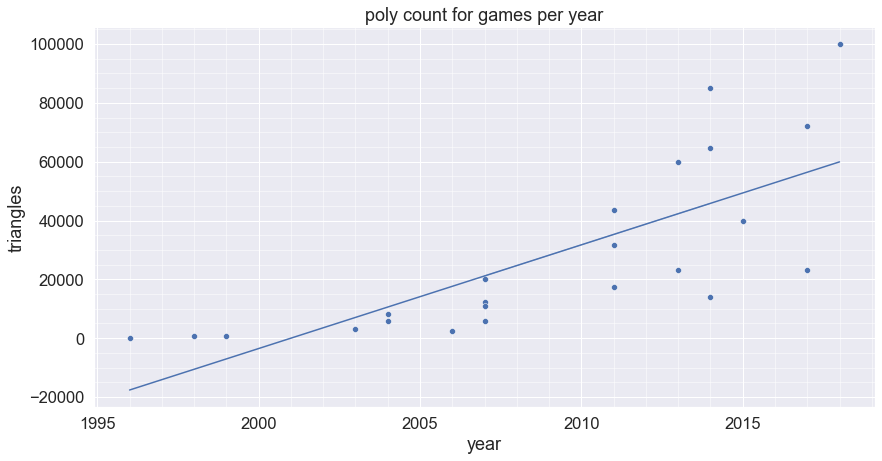

In [14]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('poly count for games per year')
sns.scatterplot(data=df,y='triangles',x='year',ax=ax)
sns.lineplot(y=np.polyval(model, df.year), x=df.year, ax=ax)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

using pydove for regplot so I can access model parameters
https://stackoverflow.com/questions/22852244/how-to-get-the-numerical-fitting-results-when-plotting-a-regression-in-seaborn/22852265#22852265
https://github.com/ttesileanu/pydove


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     27.41
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.45e-05
Time:                        22:29:39   Log-Likelihood:                -259.15
No. Observations:                  23   AIC:                             522.3
Df Residuals:                      21   BIC:                             524.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.055e+06   1.35e+06     -5.215      0.000   -9.87e+06   -4.24e+06
x1          3525.8266    673.457      5.235      0.000    2125.295    4926.358
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.587
Skew:                           0.362   Prob(JB):                        0.746
Kurtosis:                       2.703   Cond. No.                     6.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

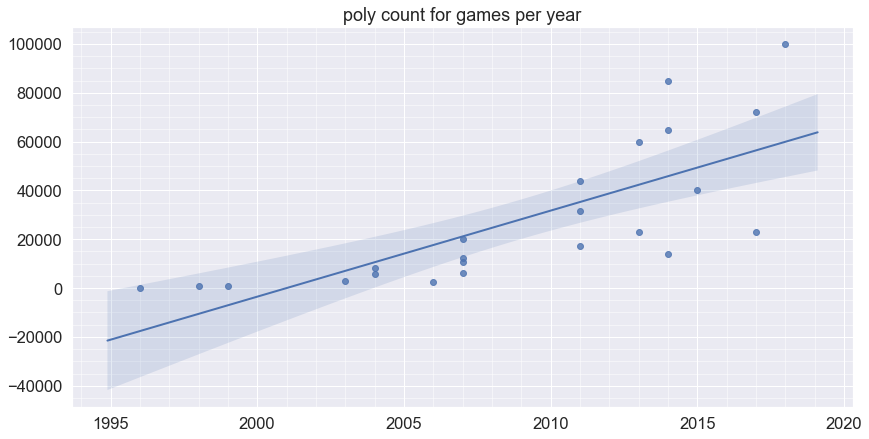

In [28]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('poly count for games per year')
m = dv.regplot(data=df,y='triangles',x='year',ax=ax, truncate=False)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     17.73
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.72e-05
Time:                        22:30:18   Log-Likelihood:                -257.02
No. Observations:                  23   AIC:                             520.0
Df Residuals:                      20   BIC:                             523.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.017e+08   4.01e+08      1.997      0.060   -3.58e+07    1.64e+09
x1         -8.022e+05      4e+05     -2.006      0.059   -1.64e+06    3.22e+04
x2           200.6680     99.617      2.014      0.058      -7.130     408.466
==============================================================================
Omnibus:                        2.368   Durbin-Watson:                   2.394
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                0.927
Skew:                          -0.272   Prob(JB):                        0.629
Kurtosis:                       3.820   Cond. No.                     4.20e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

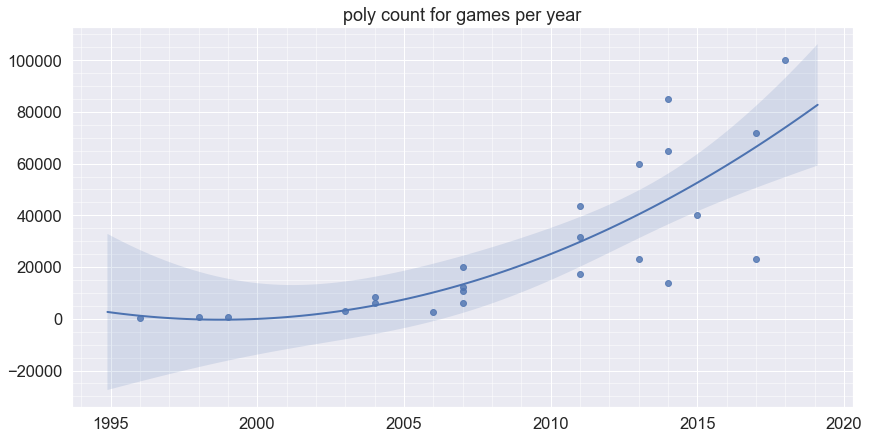

In [30]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('poly count for games per year')
m = dv.regplot(data=df,y='triangles',x='year',ax=ax, truncate=False,order=2)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     17.73
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.72e-05
Time:                        22:30:18   Log-Likelihood:                -257.02
No. Observations:                  23   AIC:                             520.0
Df Residuals:                      20   BIC:                             523.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        591.9603    299.092      1.979      0.062     -31.935    1215.856
x1           3.96e+05      2e+05      1.979      0.062   -2.14e+04    8.13e+05
x2          -396.3022    199.354     -1.988      0.061    -812.147      19.543
x3             0.0991      0.050      1.997      0.060      -0.004       0.203
==============================================================================
Omnibus:                        2.374   Durbin-Watson:                   2.394
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                0.931
Skew:                          -0.271   Prob(JB):                        0.628
Kurtosis:                       3.822   Cond. No.                     2.97e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

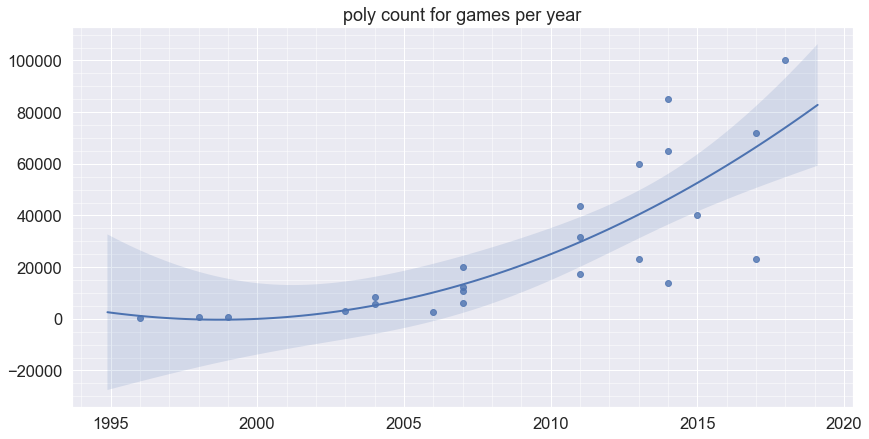

In [31]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('poly count for games per year')
m = dv.regplot(data=df,y='triangles',x='year',ax=ax, truncate=False,order=3)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
m.summary()

In [85]:
x = df.year - 2000
y = df.triangles
fit_params = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
fit_params

array([0.1723879 , 8.38521654])

In [101]:
y_fit = np.exp(fit_params[1]) * np.exp(fit_params[0] * x)
y_fit

0     41202.707607
1     48954.528307
2     48954.528307
3     58164.765886
4     97557.649134
5     82109.652182
6     82109.652182
7      3103.980940
8      8732.160911
9      8732.160911
10    14646.136323
11    14646.136323
12     2198.795390
13    12326.959187
14     3687.959642
15     7349.446215
16    14646.136323
17    41202.707607
18    48954.528307
19    29187.139126
20    14646.136323
21    29187.139126
22    29187.139126
Name: year, dtype: float64

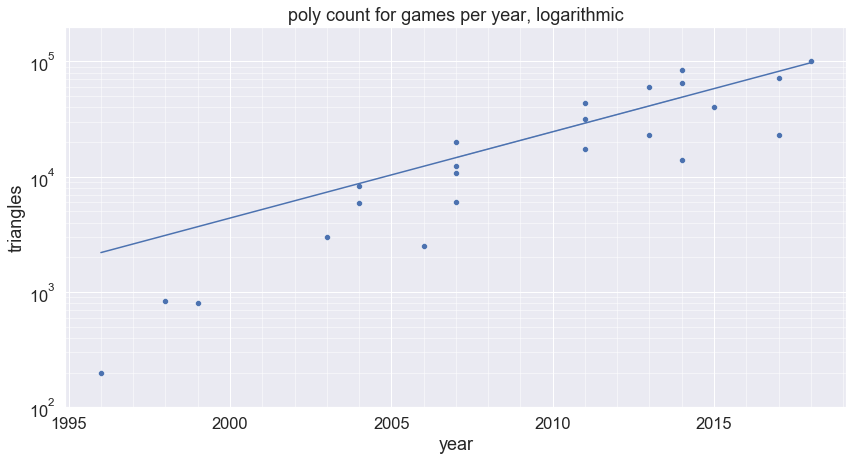

In [93]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('poly count for games per year, logarithmic')
sns.scatterplot(data=df,y='triangles',x='year',ax=ax)
sns.lineplot(y=y_fit,x=x+2_000,ax=ax)
ax.set(yscale="log")
ax.set_ylim(100, 200_000)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

In [94]:
np.exp(fit_params[1])

4381.807293455099

In [97]:
np.exp(fit_params[0])

1.1881386236729

In [98]:
np.exp(fit_params[1]) * np.exp(fit_params[0] * 0)

4381.807293455099

In [99]:
np.exp(fit_params[1]) * np.exp(fit_params[0] * 1)

5206.194486845616

In [100]:
np.exp(fit_params[1]) * np.exp(fit_params[0] * 2)

6185.680752174189

In [102]:
np.exp(fit_params[1]) * np.exp(fit_params[0] * 3)

7349.44621536819